In [6]:

from flask import Flask, render_template, request
import io
import base64
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates
import os
from datetime import datetime, timedelta


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
from arch import arch_model

import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm


import warnings
warnings.simplefilter('ignore', ValueWarning)
warnings.simplefilter('ignore', HessianInversionWarning)
warnings.simplefilter('ignore', ConvergenceWarning)
#We begin by importing the necessary libraries


In [ ]:


app = Flask(__name__)

def yf_plot(Ticker, start, end):
    Price_1 = yf.download(Ticker, start, end).Close
    Returns_1 = Price_1.pct_change().dropna()
    fig, ax1 = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    ax1[0].plot(Price_1.index, Price_1, label='Price', color='red')
    ax1[0].set_title(f'Daily Close: Price ${Ticker}')
    ax1[0].set_ylabel('Price ($)')
    ax1[0].legend(loc='upper left')
    ax1[0].grid()

    ax1[1].plot(Returns_1.index, Returns_1, label='Returns', color='blue')
    ax1[1].set_title('First Order Difference (Returns)')
    ax1[1].set_ylabel(f'Returns ${Ticker}')
    ax1[1].set_xlabel('Date')
    ax1[1].axhline(y=0, color='black', linestyle="--")
    ax1[1].legend(loc='upper left')
    ax1[1].grid()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close(fig)
    return base64.b64encode(buf.getvalue()).decode('utf8')

@app.route('/', methods=['GET', 'POST'])
def index():
    plot_url = None
    if request.method == 'POST':
        ticker = request.form['ticker']
        start = request.form['start']
        end = request.form['end']
        plot_url = yf_plot(ticker, start, end)

    return render_template('ARIMAsite.html', plot_url=plot_url)

if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


[2024-10-27 20:05:09,646] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "c:\Users\oscar.smith\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\oscar.smith\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\oscar.smith\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 880, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\oscar.smith\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 865, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)  # type: ignore[no-any-return]
           ^^^^^^^^^^^^^^^^^^^^^^

In [13]:
%tb

SystemExit: 1

In [15]:
python PLOTTER.py  # Replace with your actual filename


SyntaxError: invalid syntax (3019987820.py, line 1)

[*********************100%***********************]  1 of 1 completed


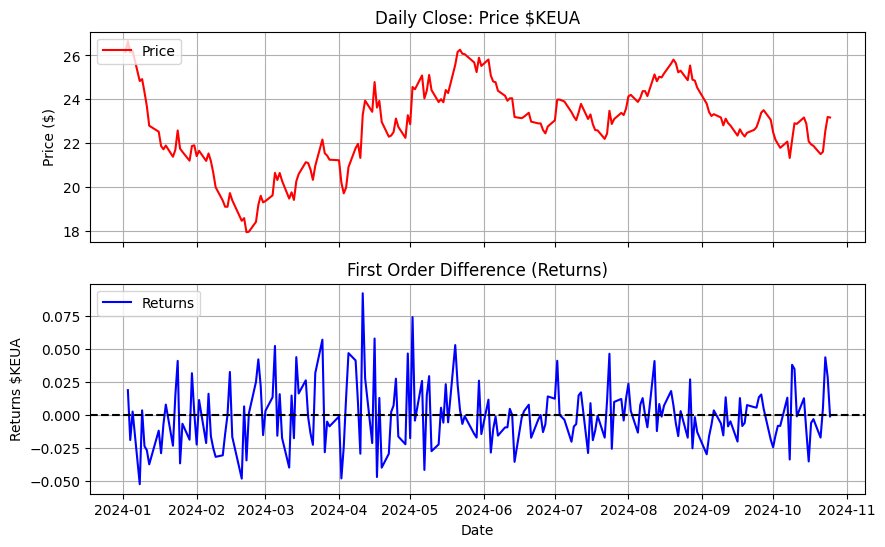

In [84]:
yf_plot('KEUA', '2024-01-01', '2024-11-11')

[*********************100%***********************]  1 of 1 completed


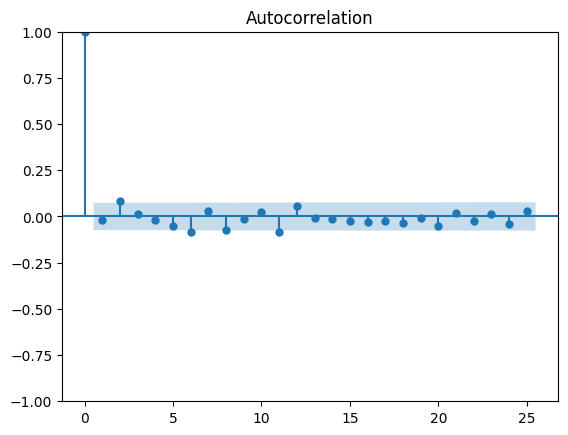

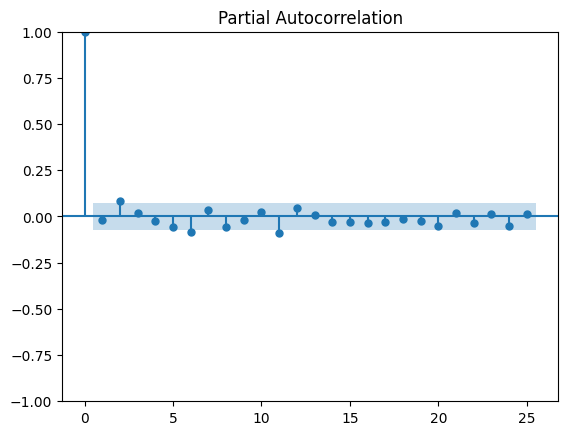

In [85]:
#Get our Data
TICKER = 'KEUA'
START = '2022-01-01'
END = '2024-12-31'
Price_1 = yf.download(TICKER, START, END).Close
Returns_1 = Price_1.pct_change().dropna()

#Choosing models
plot_acf(Returns_1, lags = 25)
plot_pacf(Returns_1, lags = 25);


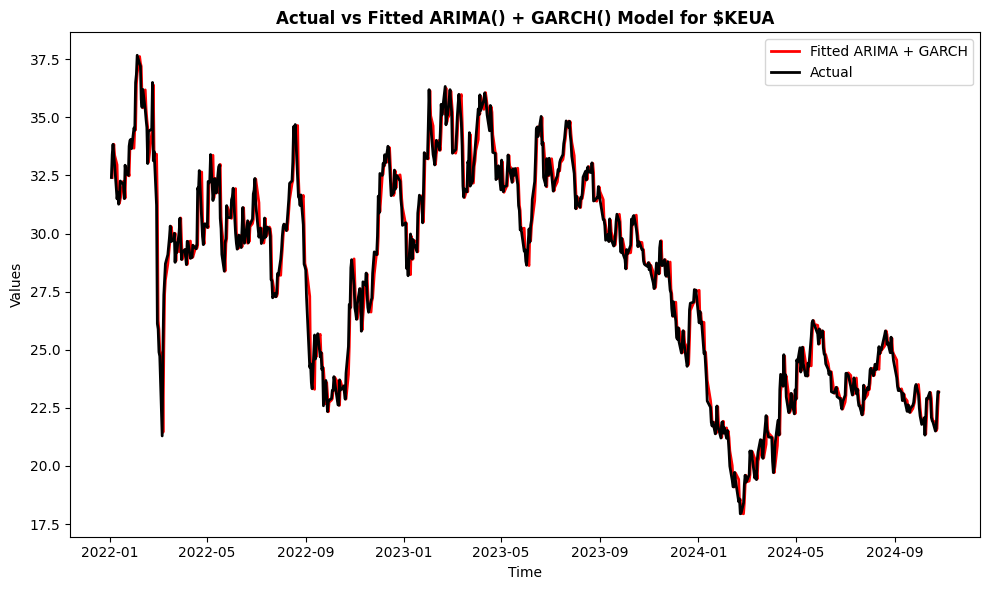

In [97]:
#Train our Models

####ARIMA HERE
model_1 = ARIMA(Price_1, order = (1,1,1))
P1_ARIMA = model_1.fit()
P1_ARIMA_fitted = P1_ARIMA.fittedvalues
ARIMA_residuals = Price_1 - P1_ARIMA_fitted

#### GARCH here

#plot our models
#ARIMA
plt.figure(figsize=(10,6))
plt.plot(P1_ARIMA_fitted[1:], label='Fitted ARIMA', color='red', lw=2)
plt.plot(Price_1, label='Actual', color='black', lw=2)
plt.title(f'Actual vs Fitted ARIMA() Model for ${TICKER}', fontweight = 'bold')
plt.xlabel('Time')
plt.ylabel('Values')

plt.legend()
plt.tight_layout()
plt.show()
